<a href="https://colab.research.google.com/github/thnahphung/ML/blob/main/Lab_7_20130099_DuongThanhPhung.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# This lab deals with **cross validation** for some classification algorithms and **clustering methods**. 

*   **Deadline: 23:59, 10/4/2023**



In [58]:
from google.colab import drive
drive.mount('/content/gdrive')
%cd '/content/gdrive/MyDrive/ML'

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).
/content/gdrive/MyDrive/ML


# Import libraries

In [41]:
from sklearn.utils.fixes import sklearn
from sklearn import datasets
import numpy as np
from sklearn import svm 
from sklearn import metrics as m
from sklearn import tree 
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split as tts
from prettytable import PrettyTable
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier as knc
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.ensemble import RandomForestClassifier 
from sklearn.naive_bayes import MultinomialNB 
from sklearn import feature_selection
from sklearn.preprocessing import OneHotEncoder
from sklearn.naive_bayes import GaussianNB
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_selection import SelectKBest,chi2
from sklearn.model_selection import cross_validate
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering
import seaborn as sns
from sklearn.neighbors import KNeighborsClassifier
from scipy.cluster.hierarchy import dendrogram, linkage 
import scipy.cluster.hierarchy as shc 
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics.cluster import completeness_score
from scipy.stats import mode

#Task 1. With **iris** dataset
*  1.1. Apply **SVM** algorithm with cross validation


In [ ]:
data = datasets.load_iris(as_frame=True)
x = data.data
y = data.target
clf = svm.SVC()
scores = cross_validate(clf,x,y,scoring='accuracy',cv=10)
print('accuracy: ',np.mean(scores['test_score']))
scores = cross_validate(clf,x,y,scoring='precision_micro',cv=10)
print('precision: ',np.mean(scores['test_score']))
scores = cross_validate(clf,x,y,scoring='recall_micro',cv=10)
print('recall: ',np.mean(scores['test_score']))
scores = cross_validate(clf,x,y,scoring='f1_micro',cv=10)
print('f1: ',np.mean(scores['test_score']))


accuracy:  0.9733333333333334
precision:  0.9733333333333334
recall:  0.9733333333333334
f1:  0.9733333333333334


*  1.2 Apply **feature selection** to the dataset and then use **RandomForest** algorithm with cross validation 

<Axes: >

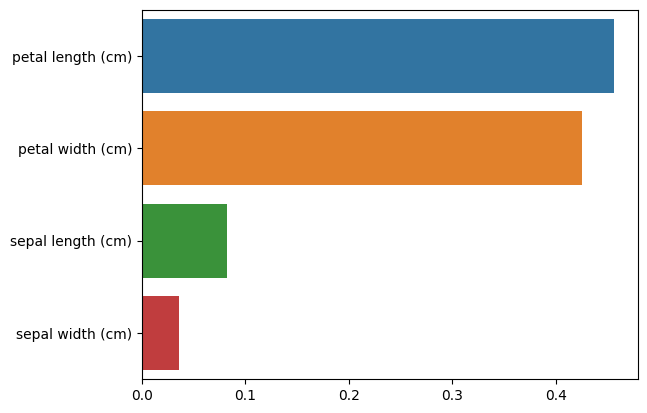

In [ ]:
clf = RandomForestClassifier()
clf.fit(x,y)
feature = pd.Series(clf.feature_importances_,index=clf.feature_names_in_).sort_values(ascending=False)
sns.barplot(x=feature,y=feature.index)

In [ ]:
scores = cross_validate(clf,x[feature[feature>0.4].index.values],y,scoring='accuracy',cv=10)
print('accuracy: ',np.mean(scores['test_score']))
scores = cross_validate(clf,x,y,scoring='precision_micro',cv=10)
print('precision: ',np.mean(scores['test_score']))
scores = cross_validate(clf,x,y,scoring='recall_micro',cv=10)
print('recall: ',np.mean(scores['test_score']))
scores = cross_validate(clf,x,y,scoring='f1_micro',cv=10)
print('f1: ',np.mean(scores['test_score']))


accuracy:  0.9666666666666666
precision:  0.96
recall:  0.9666666666666666
f1:  0.9666666666666666


#Task 2. With mnist dataset: 
*   2.1. Apply **K-Means** algorithm using k=10, 

In [42]:
mnist = datasets.load_digits()
x_mnist = mnist.data
y_mnist = mnist.target

In [43]:
kmeans = KMeans(n_clusters = 10, random_state = 0)
kmeans.fit(x_mnist)
clusters = kmeans.predict(x_mnist)

labels = np.zeros_like(clusters)

for i in range(10):
 mask = (clusters == i)
 labels[mask] = mode(y_mnist[mask])[0]

print (completeness_score(y_mnist, labels))

f1_km= m.f1_score(y_mnist, labels, average='micro')
acc_km= m.accuracy_score(y_mnist, labels)
pres_km= m.precision_score(y_mnist, labels, average='micro')
re_km= m.recall_score(y_mnist, labels, average='micro')

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


0.7514312243853245


<ipython-input-43-14922b17e558>:9: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  labels[mask] = mode(y_mnist[mask])[0]


*   2.2. Compare the obtained result with with other classification algorithms such as **Randomforest**, **kNN**, and **Naïve Bayes** in terms of accuracy, precision, recall, f1 using cross validation. 


In [44]:
clf = RandomForestClassifier() 

scores_acc_ra = cross_validate(clf,x_mnist,y_mnist,scoring='accuracy',cv=10)
scores_pre_ra = cross_validate(clf,x_mnist,y_mnist,scoring='precision_micro',cv=10)
scores_re_ra = cross_validate(clf,x_mnist,y_mnist,scoring='recall_micro',cv=10)
scores_f1_ra = cross_validate(clf,x_mnist,y_mnist,scoring='f1_micro',cv=10)

f1_ra=np.mean(scores_f1_ra['test_score'])
acc_ra=np.mean(scores_acc_ra['test_score'])
pres_ra=np.mean(scores_pre_ra['test_score'])
re_ra=np.mean(scores_re_ra['test_score'])

In [45]:
#KNN
k_range = np.arange(1,8,2)
KNN_acc =[]
KNN_pres = []
KNN_re =[]
KNN_f1 = []
for k in k_range:
  KNN = KNeighborsClassifier(n_neighbors=k)
  KNN_acc.append(np.mean(cross_validate(clf,x_mnist,y_mnist,scoring='accuracy',cv=10)['test_score']))
  KNN_pres.append(np.mean(cross_validate(clf,x_mnist,y_mnist,scoring='precision_micro',cv=10)['test_score']))
  KNN_re.append(np.mean(cross_validate(clf,x_mnist,y_mnist,scoring='recall_micro',cv=10)['test_score']))
  KNN_f1.append(np.mean(cross_validate(clf,x_mnist,y_mnist,scoring='f1_micro',cv=10)['test_score']))

In [46]:
#navie bayes
clf = MultinomialNB() 
scores_acc_nb = cross_validate(clf,x_mnist,y_mnist,scoring='accuracy',cv=10)
scores_pre_nb = cross_validate(clf,x_mnist,y_mnist,scoring='precision_micro',cv=10)
scores_re_nb = cross_validate(clf,x_mnist,y_mnist,scoring='recall_micro',cv=10)
scores_f1_nb = cross_validate(clf,x_mnist,y_mnist,scoring='f1_micro',cv=10)

f1_nb=np.mean(scores_f1_nb['test_score'])
acc_nb=np.mean(scores_acc_nb['test_score'])
pres_nb=np.mean(scores_pre_nb['test_score'])
re_nb=np.mean(scores_re_nb['test_score'])

In [47]:
d_km = {'Accuracy': acc_km, 'Precision': pres_km, 'Recall': re_km, 'F1': f1_km}
d_ra = {'Accuracy': acc_ra, 'Precision': pres_ra, 'Recall': re_ra, 'F1': f1_ra}
d_knn = {'Accuracy':max(KNN_acc), 'Precision':max(KNN_pres), 'Recall':max(KNN_re), 'F1': max(KNN_f1)}
d_nb = {'Accuracy': acc_nb, 'Precision': pres_nb, 'Recall': re_nb, 'F1': f1_nb}
pd.DataFrame({'K-Mean':pd.Series(d_km),'Random Forest' : pd.Series(d_ra), 'KNN':pd.Series(d_knn), 'Navie Bayes': pd.Series(d_nb)})

,K-Mean,Random Forest,KNN,Navie Bayes
Accuracy,0.793545,0.952132,0.953253,0.879786
Precision,0.793545,0.952129,0.954351,0.879786
Recall,0.793545,0.952142,0.951570,0.879786
F1,0.793545,0.951583,0.950469,0.879786


*   2.3. From the obtained results, **which approach is better** for this problem: Supervised learning or Unsupervised learning?

**Supervised learning**

2.4. Apply **AgglomerativeClustering** algorithm to mnist dataset using the number of clusters is 10

In [54]:
cluster = AgglomerativeClustering(n_clusters=10, affinity='euclidean', linkage='ward')

clusters = cluster.fit_predict(x_mnist)
# get clustering labels
labels = np.zeros_like(clusters)

for i in range(10):
 mask = (clusters == i)
 labels[mask] = mode(y_mnist[mask])[0]

print (completeness_score(y_mnist, labels))

f1_ac= m.f1_score(y_mnist, labels, average='micro')
acc_ac= m.accuracy_score(y_mnist, labels)
pres_ac= m.precision_score(y_mnist, labels, average='micro')
re_ac= m.recall_score(y_mnist, labels, average='micro')

print(f1_ac)
print(acc_ac)
print(pres_ac)
print(re_ac)

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


0.9021136486522541
0.8619922092376182
0.8619922092376182
0.8619922092376182
0.8619922092376182


<ipython-input-54-f5dec077b945>:9: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  labels[mask] = mode(y_mnist[mask])[0]


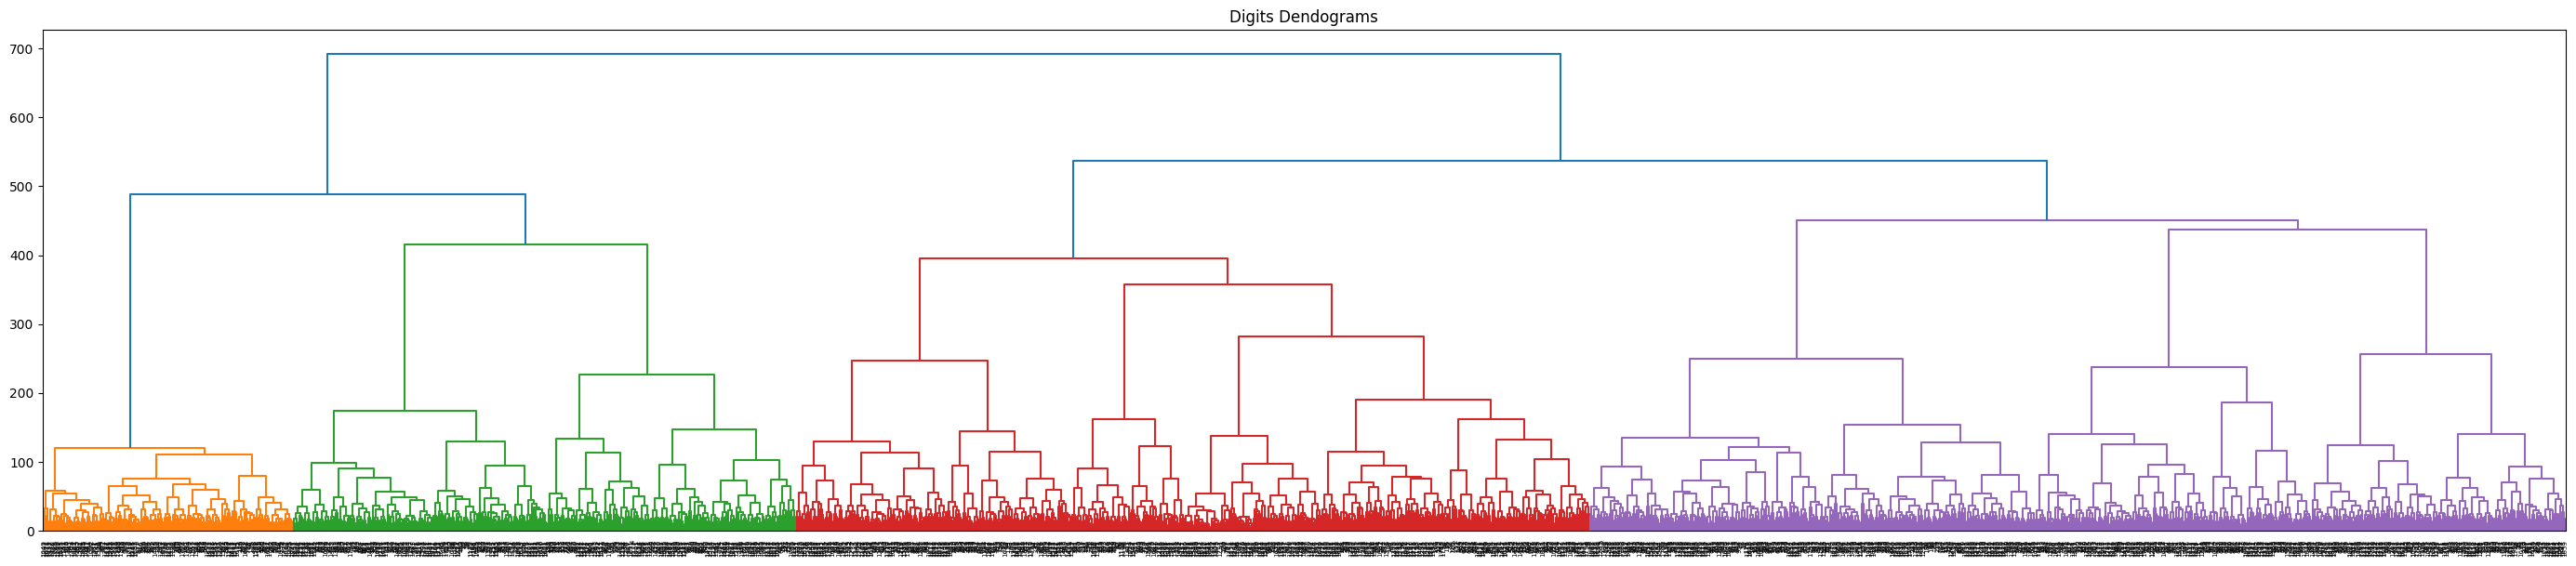

In [55]:
plt.figure(figsize=(35, 7)) 
plt.title("Digits Dendograms") 
dend = shc.dendrogram(shc.linkage(x_mnist, method='ward')) 

#Task 3. 
For given dataset (shopping-data.csv) including 5 attributes: **CustomerID**, **Genre**, **Age**, **Annual Income**, and **Spending Score**.
*   3.1. Using the **scipy library** to create the dendrograms for the given dataset (remember drop categorical attributes: **CustomerID**, **Genre**)





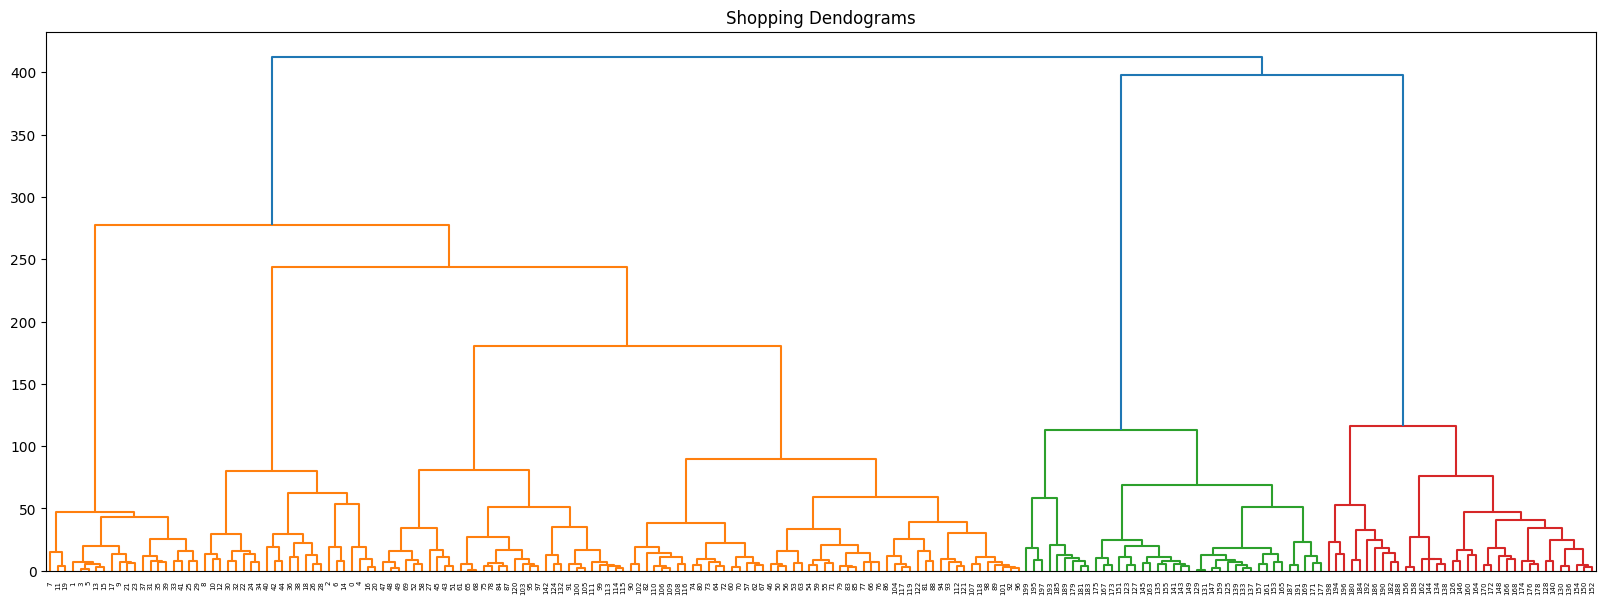

In [62]:
data = pd.read_csv('shopping-data.csv')
plt.figure(figsize=(20, 7)) 
plt.title("Shopping Dendograms") 
dend = shc.dendrogram(shc.linkage(data.iloc[:,2:].values, method='ward')) 

*   3.2. Apply K-Means to the preprocessed dataset with k belongs to [2,10]. Then compute SSE values and plot them to find the best value of k.

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: F

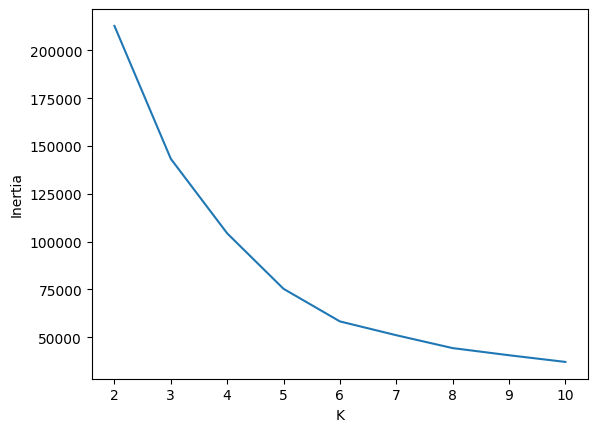

In [63]:
k_range = range(2,11)
sse=[]
for k in k_range:
  kmeans = KMeans(n_clusters=k, random_state =1)
  kmeans.fit(data.iloc[:,2:].values)
  sse.append(kmeans.inertia_)
plt.plot(k_range, sse)
plt.xlabel('K')
plt.ylabel('Inertia')
plt.show()

*   3.2. From the obtained dengrograms, choose an appropriate number of clusters and apply **AgglomerativeClustering** algorithm to the given dataset

In [64]:
AC = AgglomerativeClustering(n_clusters=10)
AC.fit_predict(data.iloc[:,2:].values)
print(AC.labels_)

[0 7 0 7 0 7 0 7 0 7 0 7 0 7 0 7 0 7 0 7 0 7 0 7 0 7 0 9 0 7 0 7 0 7 0 7 0
 7 0 7 0 7 0 9 0 9 5 9 9 9 5 9 9 5 5 5 5 8 9 5 8 4 8 5 8 4 5 8 4 9 8 5 8 8
 8 4 5 5 4 5 8 5 8 5 4 5 5 4 5 5 8 4 5 5 5 4 5 4 5 4 4 5 8 4 5 4 8 5 8 8 8
 4 5 4 4 4 8 5 5 5 4 5 5 1 4 1 2 1 2 1 2 1 4 1 2 1 2 1 2 1 2 1 4 1 2 1 2 1
 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 3 6 3 6 3 6
 3 6 1 6 3 6 1 6 3 6 3 6 3 6 3]


#Finally,
Save a copy in your Github. Remember renaming the notebook.